In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import shutil
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import thor.data as data
import thor.data.dispatch as dispatch
import thor.grid as grid
import thor.track as track
import thor.option as option
import thor.tag as tag
import thor.visualize as visualize
import thor.data.synthetic as synthetic

notebook_name = "cpol_demo.ipynb"


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [10]:
# Parent directory for saving outputs
base_local = Path.home() / "THOR_output"
start = "2005-11-13T00:00:00"
end = "2005-11-14T00:00:00"

lat = np.arange(0, 5+0.025, 0.025).tolist()
lon = np.arange(0, 5+0.025, 0.025).tolist()
grid_options = grid.create_options(name="geographic", latitude=lat, longitude=lon)
grid.check_options(grid_options)
grid.save_grid_options(grid_options, filename="synth_geographic")

2024-08-28 11:30:49,714 - thor.option - DEBUG - Saving options to /home/ewan/THOR_output/options/grid_options/synth_geographic.yaml


In [27]:
synthetic_object = synthetic.create_object_dictionary(
    start=start, center_latitude=np.mean(lat), center_longitude=np.mean(lon), direction=0, speed=10
)
starting_objects = [synthetic_object]

{'start': '2005-11-13T00:00:00',
 'center_latitude': np.float64(2.5),
 'center_longitude': np.float64(2.5),
 'radius': 0.1,
 'alt_center': 3000.0,
 'alt_radius': 1000.0,
 'intensity': 50,
 'eccentricity': 0.4,
 'orientation': 0.7853981633974483,
 'direction': 0,
 'speed': 10}

In [ ]:
synthetic_options = synthetic.synthetic_data_options()

In [19]:
ds = synthetic.create_dataset(grid_options)

In [22]:
ds = synthetic.add_reflectivity(ds, 4, 2, 10, 1e3, 1e3, 40, .4, np.pi/4)

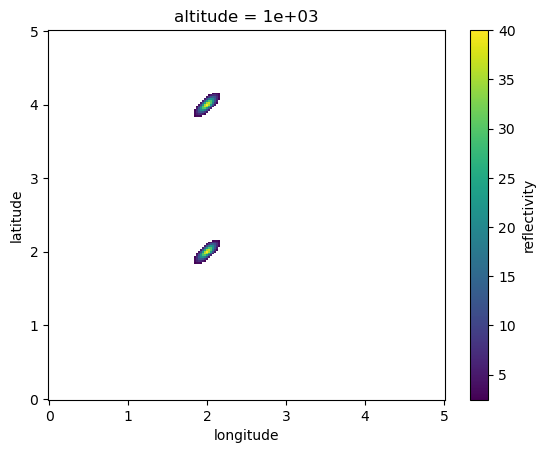

In [23]:
ds["reflectivity"].sel(altitude=1e3, method="nearest").plot()

In [ ]:
synthetic.create_object_dictionary()

In [ ]:

# Create the tag_options dictionary
era5_pl_tag_options = data.era5.tag_options()
era5_sl_tag_options = data.era5.tag_options(dataset="era5_sl")
tag_options = option.consolidate_options([era5_pl_tag_options, era5_sl_tag_options])
tag.save_tag_options(tag_options, filename="era5")

# Create the track_options dictionary
track_options = option.mcs(dataset="cpol", tags=["era5_pl", "era5_sl"])
option.save_track_options(track_options, filename="cpol_mcs")

# Create the display_options dictionary
visualize_options = {
    obj: visualize.option.runtime_options(obj, save=True, style="presentation")
    for obj in ["cell", "anvil", "mcs"]
}
visualize_options["middle_cloud"] = visualize.option.runtime_options(
    "middle_cloud", save=True, style="presentation", figure_types=["mask"]
)
visualize.option.save_display_options(visualize_options, filename="runtime_mcs")
visualize_options = None

In [5]:
tag_options = None

output_directory = base_local / "runs/cpol_demo_geographic"
if output_directory.exists():
    shutil.rmtree(output_directory)
times = data.utils.generate_times(data_options["cpol"])
tracks = track.simultaneous_track(
    times,
    data_options,
    grid_options,
    track_options,
    tag_options,
    visualize_options,
    output_directory=output_directory
)

2024-08-27 16:34:30,474 - thor.track - DEBUG - Beginning simultaneous tracking.
2024-08-27 16:34:30,580 - thor.track - INFO - Processing 2005-11-13T14:00:09.
2024-08-27 16:34:30,581 - thor.data.aura - DEBUG - Updating cpol dataset for 2005-11-13T14:00:09.
2024-08-27 16:34:30,582 - thor.data.aura - DEBUG - Converting cpol data from twp10cpolgrid150.b2.20051113.140000.nc
2024-08-27 16:34:30,613 - thor.data.aura - DEBUG - Creating new geographic grid with spacing 0.025 m, 0.025 m.
2024-08-27 16:34:33,215 - thor.track - DEBUG - Processing hierarchy level 0.
2024-08-27 16:34:33,216 - thor.track - DEBUG - Tracking cell.
2024-08-27 16:34:42,249 - thor.match.match - DEBUG - Matching cell objects.
2024-08-27 16:34:42,250 - thor.match.match - DEBUG - No previous mask, or no objects in previous mask.
2024-08-27 16:34:42,255 - thor.visualize.runtime - DEBUG - Generating runtime visualizations.
2024-08-27 16:34:42,256 - thor.track - DEBUG - Tracking middle_cloud.
2024-08-27 16:34:42,260 - thor.visu